In [4]:
import pandas
# we read bank data 
data = pandas.read_csv("datasets/bank.csv")
# above data variable has the our data
data
# eda - exploratory data analysis

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,5849,0.0,NaN,Urban,Y
1,LP001003,Male,Yes,Graduate,No,4583,1508.0,128.0,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,3000,0.0,66.0,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,2583,2358.0,120.0,Urban,Y
4,LP001008,Male,No,Graduate,No,6000,0.0,141.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,Graduate,No,2900,0.0,71.0,Rural,Y
610,LP002979,Male,Yes,Graduate,No,4106,0.0,40.0,Rural,Y
611,LP002983,Male,Yes,Graduate,No,8072,240.0,253.0,Urban,Y
612,LP002984,Male,Yes,Graduate,No,7583,0.0,187.0,Urban,Y


In [5]:
# eda
# find empty records
data.isnull().sum()
# below we can see we some empties
# currently for self employed we Yes/No, 

Loan_ID               0
Gender                0
Married               0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# categorical variable - Nominal and Ordinal
# nominal - the variables do not have order i. colors, red and blue are same
# ordinal - the varibles have order i.e  sizes small is less than large
# fill empty in self employed
data['Self_Employed'].fillna("Neutral", inplace=True)  # update
#data['Self_Employed'].head(50)

In [7]:
# fill loan amount with median()
median = data['LoanAmount'].median()
median
# fill with median
data['LoanAmount'].fillna(median, inplace = True)
data

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,5849,0.0,128.0,Urban,Y
1,LP001003,Male,Yes,Graduate,No,4583,1508.0,128.0,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,3000,0.0,66.0,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,2583,2358.0,120.0,Urban,Y
4,LP001008,Male,No,Graduate,No,6000,0.0,141.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,Graduate,No,2900,0.0,71.0,Rural,Y
610,LP002979,Male,Yes,Graduate,No,4106,0.0,40.0,Rural,Y
611,LP002983,Male,Yes,Graduate,No,8072,240.0,253.0,Urban,Y
612,LP002984,Male,Yes,Graduate,No,7583,0.0,187.0,Urban,Y


In [8]:
# basic stats
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443
std,6109.041673,2926.248369,84.107233
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


In [20]:
data2 = data[['ApplicantIncome', 'LoanAmount']]
data2


,ApplicantIncome,LoanAmount
0,5849,128.0
1,4583,128.0
2,3000,66.0
3,2583,120.0
4,6000,141.0
...,...,...
609,2900,71.0
610,4106,40.0
611,8072,253.0
612,7583,187.0


In [21]:
data2.corr()

,ApplicantIncome,LoanAmount
ApplicantIncome,1.000000,0.565181
LoanAmount,0.565181,1.000000


In [10]:
# proportion of gender
data.groupby(['Education', 'Gender', 'Self_Employed']).size()

Education     Gender  Self_Employed
Graduate      Female  Neutral            6
                      No                83
                      Yes               15
              Male    Neutral           20
                      No               306
                      Yes               50
Not Graduate  Female  Neutral            2
                      No                15
                      Yes                4
              Male    Neutral            4
                      No                96
                      Yes               13
dtype: int64

In [11]:
# grouping 
# what is the average Loan amount by gender
data.groupby(['Gender'])['LoanAmount'].mean()

Gender
Female    135.240000
Male      148.439673
Name: LoanAmount, dtype: float64

In [12]:
# group by gender , education by average loan amount
data.groupby(['Gender', 'Education'])[['LoanAmount','ApplicantIncome']].mean()

LoanAmount  ApplicantIncome
Gender Education                                
Female Graduate      139.826923      5369.673077
       Not Graduate  112.523810      4569.476190
Male   Graduate      156.957447      5992.345745
       Not Graduate  120.097345      3630.061947

In [13]:
# graphs - counttplot, barplot, swarm plot, scatter plot, pie chart
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Text(0, 0.5, 'No of Members')

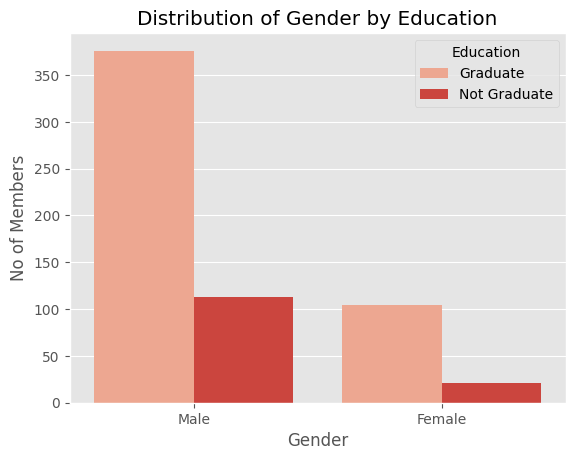

In [14]:
plt.style.use("ggplot")
sns.countplot(x = "Gender", data=data, palette="Reds", hue="Education")
# count plot can do uni and bivariate
# we learn that male that were graduate are the majority
# the bank could bring more non graduates, more women on board
plt.title("Distribution of Gender by Education")
plt.ylabel("No of Members")

Text(0, 0.5, 'Avg. LoanAmount')

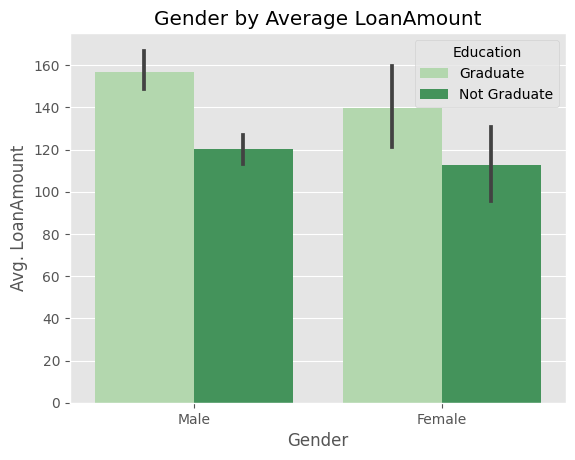

In [15]:
# bar plot
import numpy
sns.barplot(x= "Gender", y = 'LoanAmount', data=data, estimator=numpy.mean,
            palette="Greens", hue="Education")
plt.title("Gender by Average LoanAmount")
plt.ylabel("Avg. LoanAmount")

c:\Users\collins maina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Employment Distribution')

c:\Users\collins maina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


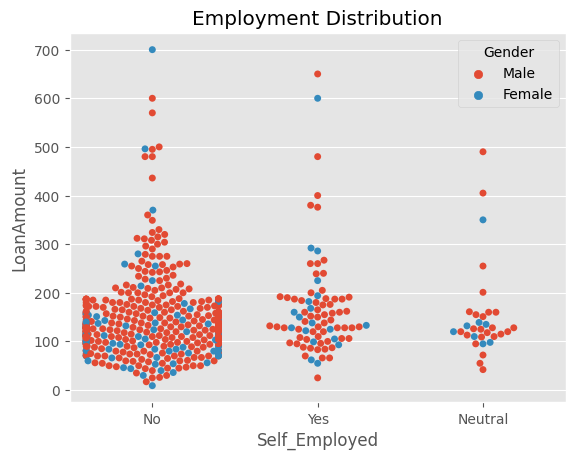

In [16]:
# swarm plot
sns.swarmplot(x = "Self_Employed", y = "LoanAmount", data=data, hue="Gender")
plt.title("Employment Distribution")

Text(0.5, 1.0, 'Applicant income vs Loan Amount')

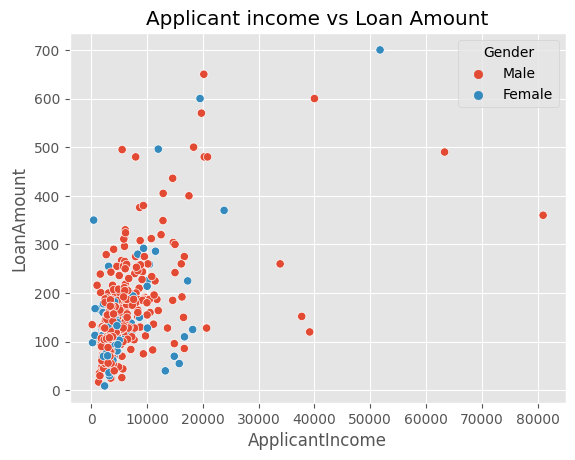

In [17]:
# scatter plot
sns.scatterplot(x = "ApplicantIncome", y = "LoanAmount", data = data, hue="Gender")
plt.title("Applicant income vs Loan Amount")


<Axes: >

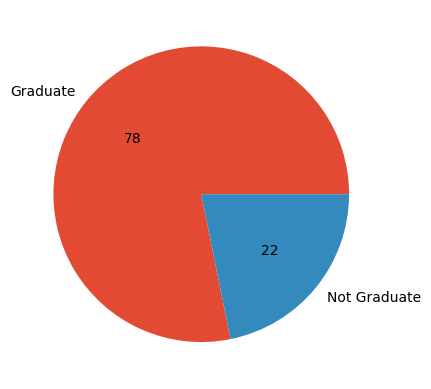

In [18]:
# Pie Chart
data.groupby("Education").size().plot(kind='pie', autopct= "%0.0f")